In [ ]:
import matplotlib.pyplot as plt
from utils import NuScenesDataSet

dataroot='../../../../datasets/nuscenes/'
nuscd = NuScenesDataSet(dataroot)

## Visualize BEV Mask 

28130 6019


/home/dimitris/miniconda3/envs/condapy310/lib/python3.10/site-packages/nuscenes/map_expansion/map_api.py:1823: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
/home/dimitris/miniconda3/envs/condapy310/lib/python3.10/site-packages/nuscenes/map_expansion/map_api.py:1824: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  interiors = [int_coords(pi.coords) for poly in polygons for pi in poly.interiors]


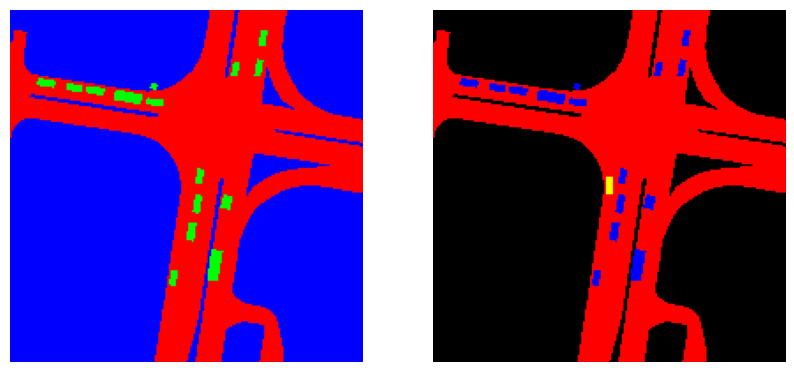

In [16]:
train_samples, val_samples = nuscd.get_training_val_samples()
print(len(train_samples), len(val_samples)) 

idx = 40
bev_mask = nuscd.get_samples_bev_mask(train_samples[idx], distance_around_ego = (100,100), layers_names = ['drivable_area'], mask_size = (200,200))
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(bev_mask)


bev_mask = nuscd.add_ego_vehicle_to_mask(bev_mask, distance_around_ego = (100,100))
bev_mask = nuscd.from_mask_to_rgb(bev_mask)
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(bev_mask)
plt.show()

## Save BEV Mask 

In [19]:
train_samples, val_samples = nuscd.get_training_val_samples()
print(len(train_samples), len(val_samples)) 

file_path_train = '../../../../datasets/nusc_bev_mask_train/'
file_path_val = '../../../../datasets/nusc_bev_mask_val/'

for idx, sample in enumerate(train_samples):
    mask = nuscd.get_samples_bev_mask(sample, distance_around_ego = (100,100), layers_names = ['drivable_area'], mask_size = (200,200))
    nuscd.save_as_binary(mask, file_path_train+str(idx)+'.txt')
    if idx%3000 ==0: print(f'{idx} training samples saved')
    
for idx, sample in enumerate(val_samples):
    mask = nuscd.get_samples_bev_mask(sample, distance_around_ego = (100,100), layers_names = ['drivable_area'], mask_size = (200,200))
    nuscd.save_as_binary(mask, file_path_val+str(idx)+'.txt')
    if idx%3000 ==0: print(f'{idx} val samples saved')


28130 6019
0 training samples saved
3000 training samples saved
6000 training samples saved
9000 training samples saved
12000 training samples saved
15000 training samples saved
18000 training samples saved
21000 training samples saved
24000 training samples saved
27000 training samples saved
0 val samples saved
3000 val samples saved
6000 val samples saved


## Load and test  BEV Mask 

In [26]:
import tensorflow as tf

file_path_train = '../../../../datasets/nusc_bev_mask_train/'
file_path_val = '../../../../datasets/nusc_bev_mask_val/'
train_files_paths, val_files_paths = nuscd.get_train_val_file_paths(file_path_train, file_path_val)
print(len(train_files_paths), len(val_files_paths))

#to load the bev_masks it is nessesary to know the dtype and shape of the saved bev_masks to rightly decode the data. Which is in our case float32 and (200,200,3)
train_dataset_bev_mask = tf.data.Dataset.from_tensor_slices(train_files_paths).map(lambda file_path: nuscd.read_binary_file(file_path, tf.float32, (200,200,3)))
val_dataset_bev_mask = tf.data.Dataset.from_tensor_slices(train_files_paths).map(lambda file_path: nuscd.read_binary_file(file_path, tf.float32, (200,200,3)))



28130 6019


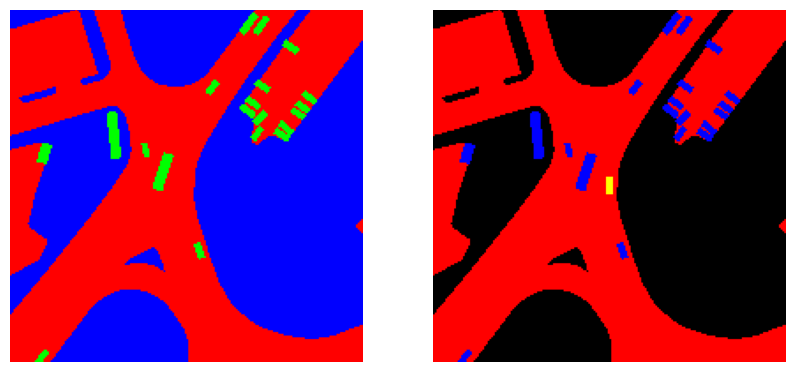

In [36]:
idx = 5003

for x in val_dataset_bev_mask.skip(idx):
    bev_mask = x
    break

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(bev_mask)

bev_mask = nuscd.add_ego_vehicle_to_mask(bev_mask, distance_around_ego=(100,100))
bev_mask = nuscd.from_mask_to_rgb(bev_mask)

plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(bev_mask)
plt.show()